In [1]:
from helper import Helper
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Dropout, Activation, MaxPool2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.losses import CategoricalCrossentropy
from time import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
h = Helper()

train_it, validation_it, test_it = h.construct_data_generator_w_validation()

Found 22050 images belonging to 3 classes.
Found 3150 images belonging to 3 classes.
Found 6300 images belonging to 3 classes.


In [3]:
def build_model(optimizer, loss, name):
    model = Sequential(name=name)
    
    model.add(Conv2D(32, (5,5), input_shape = (224, 224, 3), activation = 'relu'))
    model.add(Conv2D(32, (5,5), activation = 'relu'))
    model.add(MaxPool2D(pool_size = (2,2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(64, (5,5), activation = 'relu'))
    model.add(Conv2D(64, (5,5), activation = 'relu'))
    model.add(MaxPool2D(pool_size = (2,2)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(256, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(3, activation = 'softmax'))
    
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    model.summary()
    
    return model

In [4]:
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
loss = 'categorical_crossentropy'

In [5]:
tblog_path = h.logs_directory.format(time())
tb_log = TensorBoard(log_dir = tblog_path, profile_batch=0)

In [6]:
model = build_model(sgd, loss, 'cnn_topomap_classification_model_vgg')

Model: "cnn_topomap_classification_model_vgg"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 220, 220, 32)      2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 216, 216, 32)      25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 108, 108, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 108, 108, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 104, 104, 64)      51264     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 100, 100, 64)      102464    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (

In [7]:
r = model.fit_generator(train_it, epochs=40, callbacks=[tb_log], validation_data=validation_it)

Epoch 1/40
173/173 [==============================] - 160s 922ms/step - loss: 1.1195 - accuracy: 0.3339 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 2/40
173/173 [==============================] - 153s 883ms/step - loss: 1.0987 - accuracy: 0.3355 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 3/40
173/173 [==============================] - 155s 893ms/step - loss: 1.0985 - accuracy: 0.3370 - val_loss: 1.0975 - val_accuracy: 0.3517
Epoch 4/40
173/173 [==============================] - 155s 897ms/step - loss: 1.0747 - accuracy: 0.4100 - val_loss: 1.0142 - val_accuracy: 0.4892
Epoch 5/40
173/173 [==============================] - 155s 897ms/step - loss: 0.9840 - accuracy: 0.4910 - val_loss: 0.9066 - val_accuracy: 0.5686
Epoch 6/40
173/173 [==============================] - 157s 907ms/step - loss: 0.8923 - accuracy: 0.5595 - val_loss: 0.7754 - val_accuracy: 0.6381
Epoch 7/40
173/173 [==============================] - 156s 904ms/step - loss: 0.8054 - accuracy: 0.6121 - val_loss: 0.7075 -

In [8]:
evaluate = model.evaluate_generator(test_it)

In [9]:
y_prob = model.predict_generator(test_it)

In [10]:
h.save(model, r, evaluate, y_prob, 'cnn_topomap_classification_model_vgg')

model saved, path: models/cnn_topomap_classification_model_vgg.h5


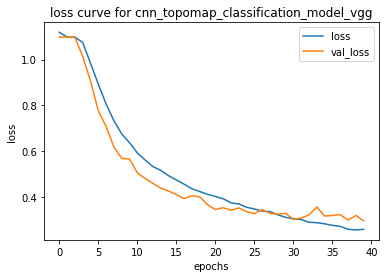

In [11]:
plt.figure()

plt.title('loss curve for cnn_topomap_classification_model_vgg')

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')

plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.savefig('results/loss curve for cnn_topomap_classification_model_vgg.png')

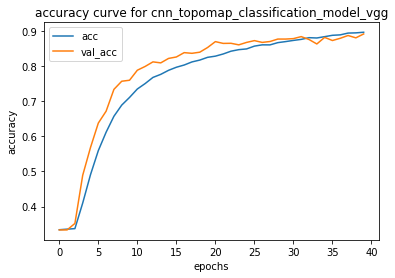

In [12]:
plt.figure()

plt.title('accuracy curve for cnn_topomap_classification_model_vgg')

plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')

plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.savefig('results/accuracy curve for cnn_topomap_classification_model_vg.png')